In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
shapleymtx = pd.read_pickle('shapleyNN.pkl')

### Graph Shapley for Finance, insurance and real estate industry

1. Imporve the last visualization by taking the absolute value and generate feature impact plot
2. Color code individual shapley values by their feature value. Break the original industry graph to 3, each of which describe a feature

In [17]:
print(shapleymtx[0].columns.tolist())

['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'dolvol', 'ill', 'zerotrade', 'baspread', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'sp', 'agr', 'nincr', 'return(t-1)', 'feature: dolvol', 'feature: baspred', 'feature: sp']


In [18]:
for i in range(8):
    shapleymtx[i] = shapleymtx[i].drop(columns = ['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'ill', 'zerotrade', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'agr', 'nincr', 'return(t-1)'])

**separate industry samples**

In [20]:
shapley8 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[70:80,:]
    shapley8.append(df)

In [35]:
shapley8[0]   # data from model 1

,dolvol,baspread,sp,feature: dolvol,feature: baspred,feature: sp
70,-1.516074,-0.225491,-0.223889,0.000187,-0.000388,-5.635770e-07
71,1.650139,-0.758991,-0.380767,-0.000053,-0.000170,5.157915e-06
72,-0.017335,-0.782841,-0.447704,0.000002,-0.000451,2.585134e-05
73,1.607214,-0.381632,-0.577777,-0.000057,0.000058,1.818976e-04
74,0.231330,-0.218614,-0.375436,-0.000527,0.000112,-6.345819e-05
75,0.666240,-0.440499,0.193242,-0.000284,-0.000233,-2.913409e-05
76,-0.803296,1.368149,-0.532193,-0.000320,-0.000011,3.111801e-04
77,0.106710,-0.706570,-0.415581,-0.000113,0.000007,3.183673e-05
78,-0.074437,-0.850680,-0.080657,-0.000066,0.000030,1.258051e-04
79,0.828111,0.597227,-0.198795,0.000106,-0.000023,-3.992857e-04


In [49]:
shapley8[0].iloc[:,[0,3]]

,dolvol,feature: dolvol
70,-1.516074,0.000187
71,1.650139,-0.000053
72,-0.017335,0.000002
73,1.607214,-0.000057
74,0.231330,-0.000527
75,0.666240,-0.000284
76,-0.803296,-0.000320
77,0.106710,-0.000113
78,-0.074437,-0.000066
79,0.828111,0.000106


### plan
for each feature: <br>
(x-axis: time/model; y-axis: value)<br>
  for each bin(industry, color code): <br>
    dots as individual shapley values
    line graph for average over time
***
take absolute value and graph feature impact

In [33]:
shapley8_abs = list()

df = pd.DataFrame()
for i in range(8):
    df = shapley8[i][['feature: dolvol', 'feature: baspred', 'feature: sp']].abs()
    shapley8_abs.append(df)

In [47]:
average_shap_values

[feature: dolvol     0.000171
 feature: baspred    0.000148
 feature: sp         0.000117
 dtype: float64,
 feature: dolvol     0.000356
 feature: baspred    0.000742
 feature: sp         0.000100
 dtype: float64,
 feature: dolvol     0.000248
 feature: baspred    0.000270
 feature: sp         0.000090
 dtype: float64,
 feature: dolvol     0.000216
 feature: baspred    0.000349
 feature: sp         0.000224
 dtype: float64,
 feature: dolvol     0.000201
 feature: baspred    0.000291
 feature: sp         0.000256
 dtype: float64,
 feature: dolvol     0.000296
 feature: baspred    0.000222
 feature: sp         0.000120
 dtype: float64,
 feature: dolvol     0.000312
 feature: baspred    0.000389
 feature: sp         0.000151
 dtype: float64,
 feature: dolvol     0.000263
 feature: baspred    0.000274
 feature: sp         0.000112
 dtype: float64]

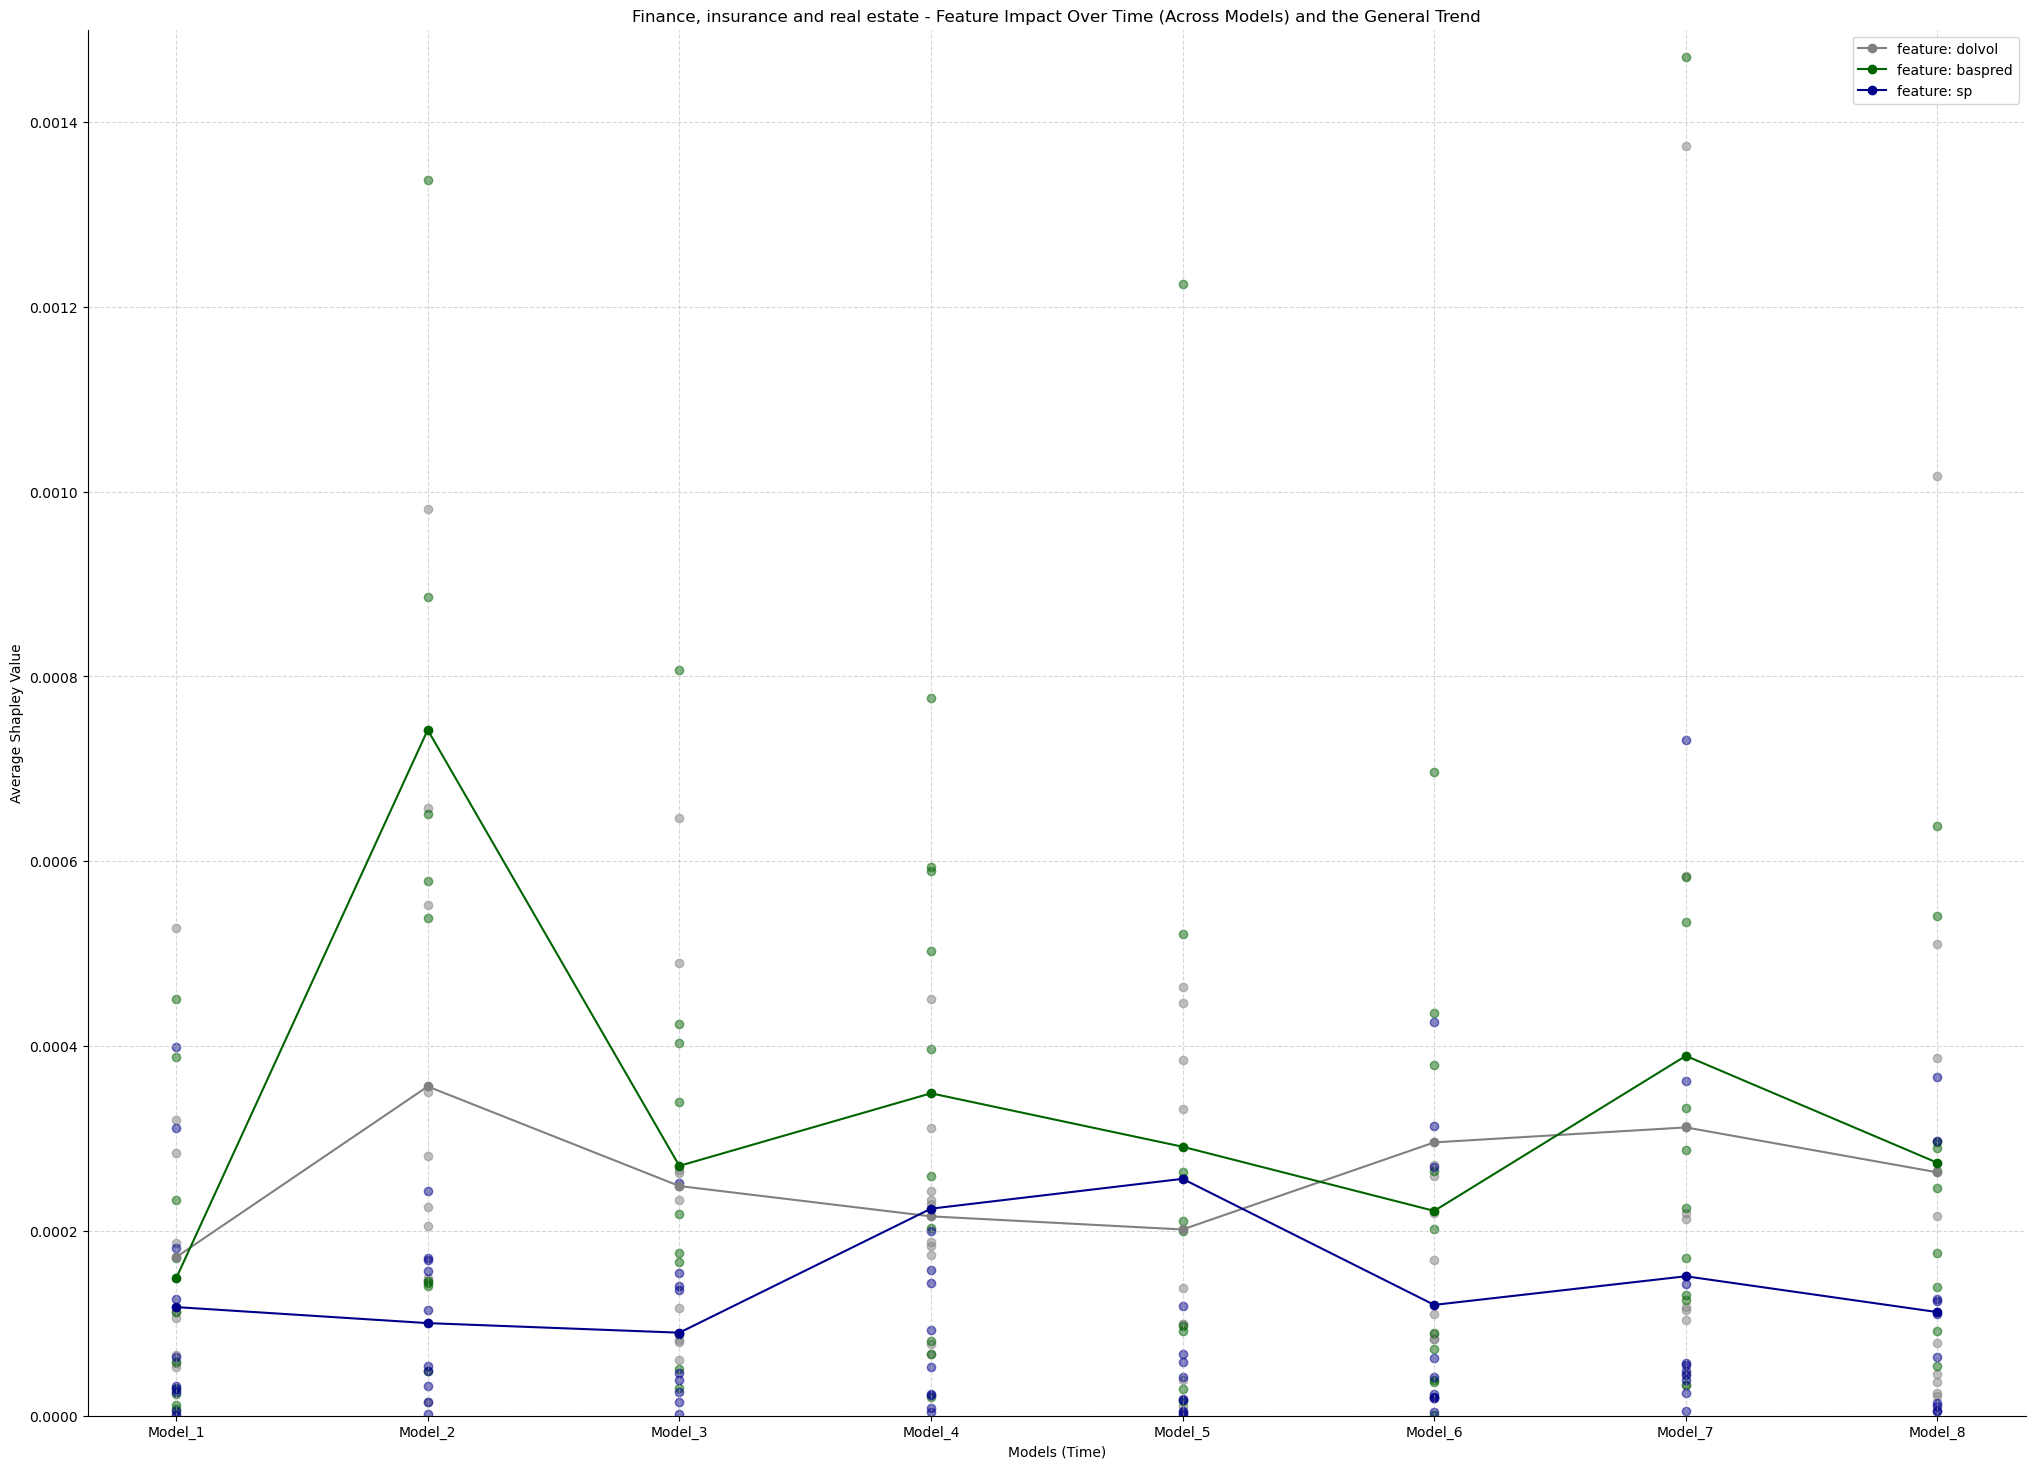

In [46]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley8:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 18))
dotscol = ['grey', 'darkgreen', 'darkblue']

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley8_abs])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color=dotscol[feature_index])


# plot average Shapley
colors = ['grey', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Finance, insurance and real estate - Feature Impact Over Time (Across Models) and the General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(0.00, 0.0015)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Plan
Color code individual shapley values by their feature value. Break the original industry graph to 3, each of which describe a feature

In [54]:
shapdf8 = shapley8[0].iloc[:,[0,3]]
shapdf8

,dolvol,feature: dolvol
70,-1.516074,0.000187
71,1.650139,-0.000053
72,-0.017335,0.000002
73,1.607214,-0.000057
74,0.231330,-0.000527
75,0.666240,-0.000284
76,-0.803296,-0.000320
77,0.106710,-0.000113
78,-0.074437,-0.000066
79,0.828111,0.000106


In [95]:
shapley8[i].iloc[:,[3]].mean()

feature: dolvol    0.000097
dtype: float64

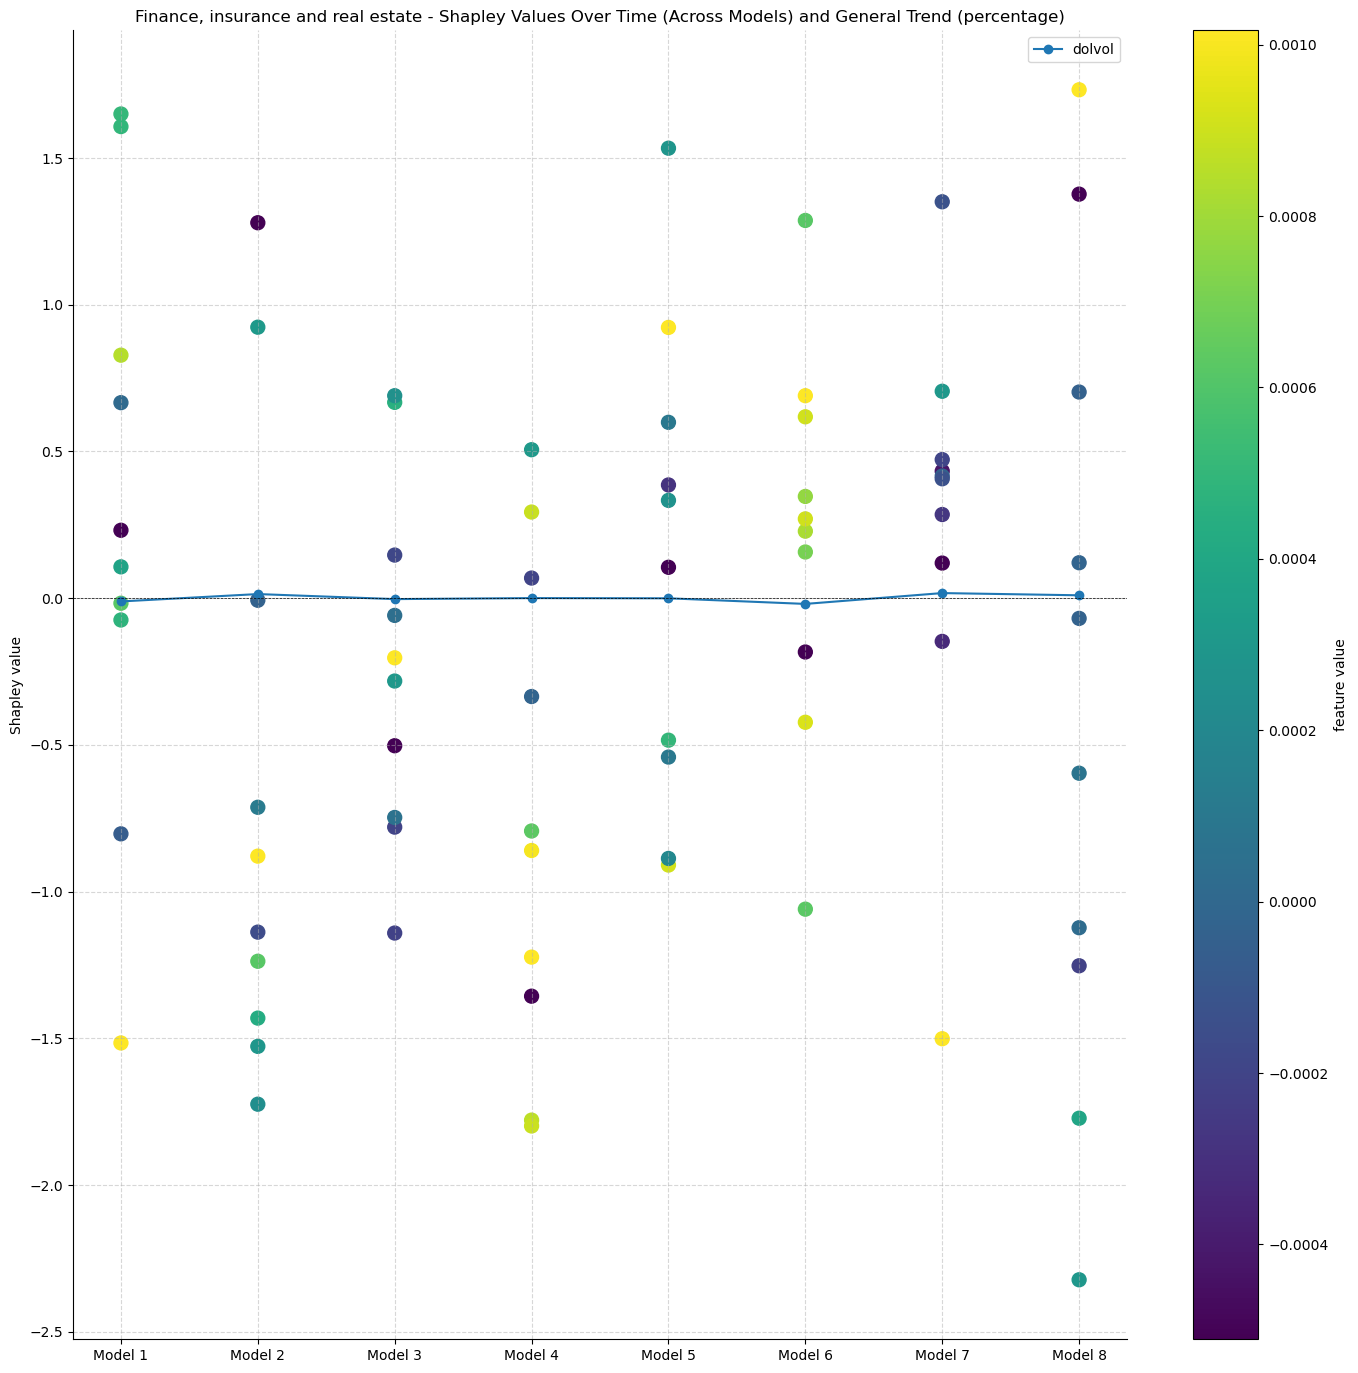

In [105]:
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(17, 17))

# feature 1: dolvol

# calculate average
average_shap_values = []
for i in range(8):
    df = shapley8[i].iloc[:,[3]]
    average_shap_values.append(df.mean()*100)  
    
# plot average
plt.plot(range(8), average_shap_values, label = "dolvol" ,marker='o', linewidth=1.5)


# plot dots
for i in range(8):
    df = shapley8[i].iloc[:,[0,3]]  # change this indexing line when switching to other features
    plt.scatter([i]*10, df.iloc[:,0], c=df.iloc[:,1], cmap='viridis', s=100)

# figure settings
x_labels = [f"Model {i}" for i in range(1,9)]
plt.xticks(range(8), x_labels)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

plt.ylabel('Shapley value')
plt.title('Finance, insurance and real estate - Shapley Values Over Time (Across Models) and General Trend (percentage)')
plt.colorbar(label='feature value')
plt.show()


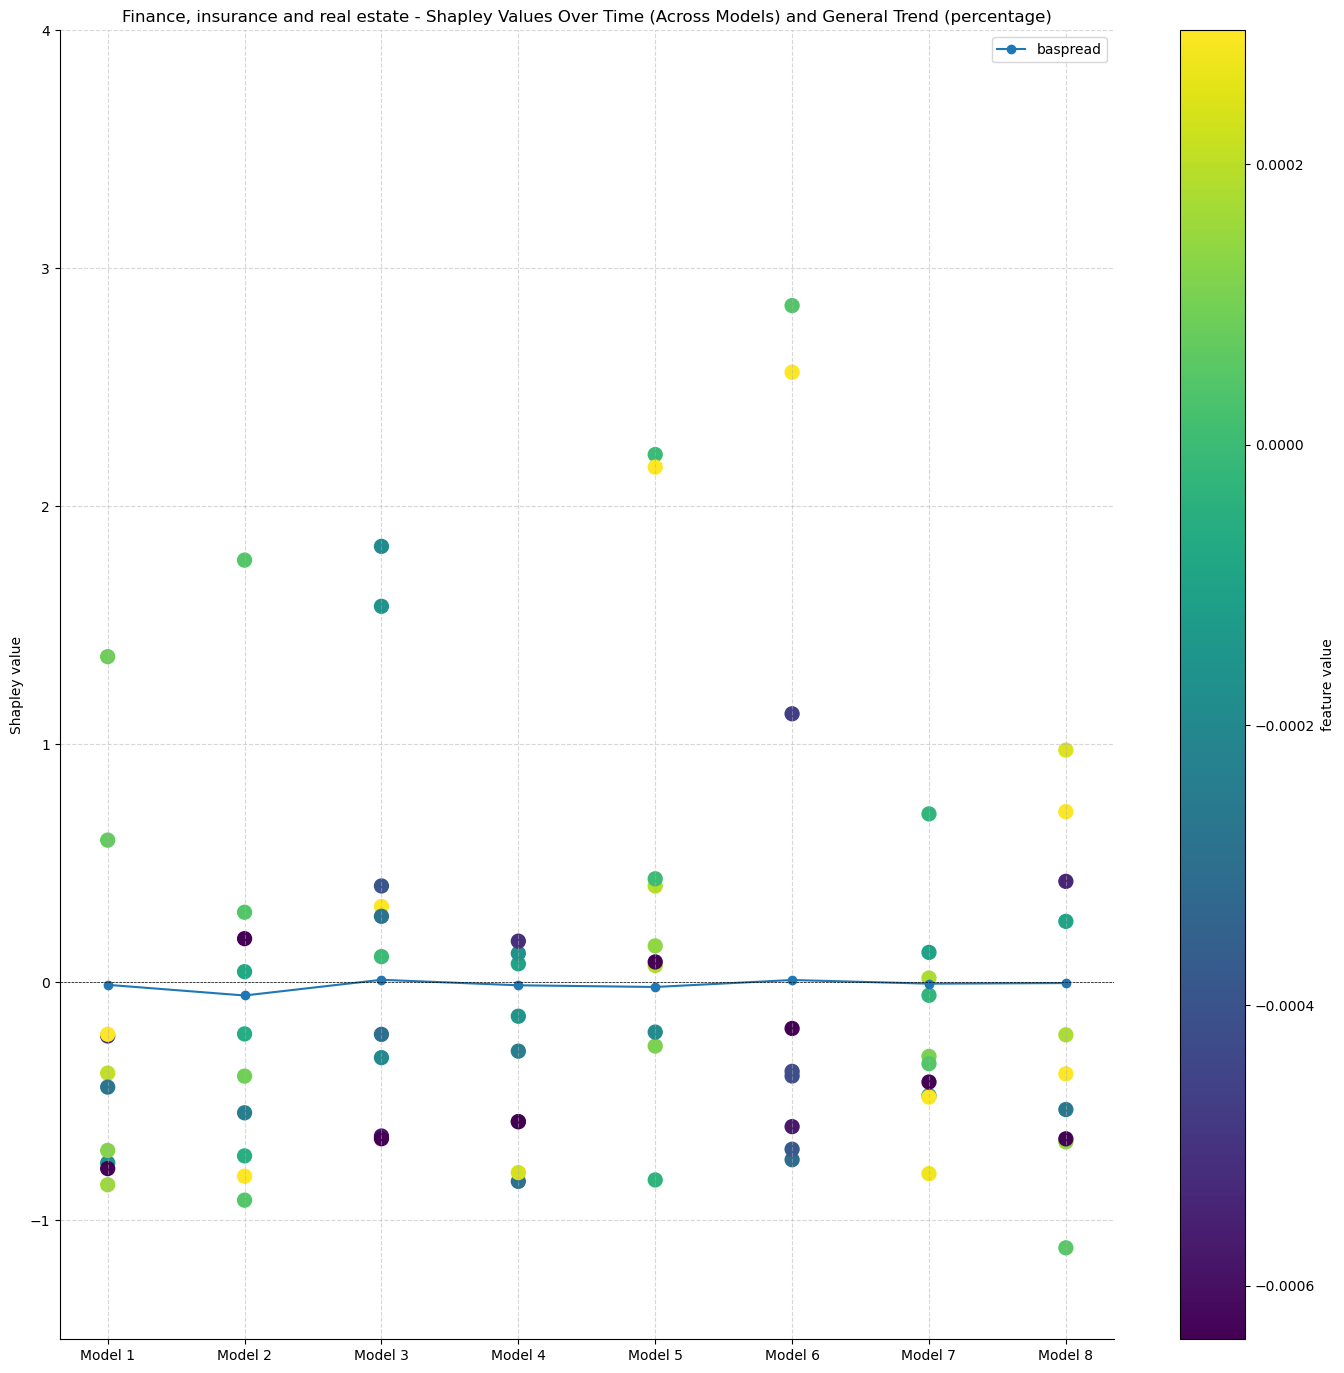

In [106]:
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(17, 17))

# feature 2

# calculate average
average_shap_values = []
for i in range(8):
    df = shapley8[i].iloc[:,[4]]  # change this line when plotting other features
    average_shap_values.append(df.mean()*100)  
    
# plot average
plt.plot(range(8), average_shap_values, label = "baspread" ,marker='o', linewidth=1.5)


# plot dots
for i in range(8):
    df = shapley8[i].iloc[:,[1,4]]  # change this indexing line when switching to other features
    plt.scatter([i]*10, df.iloc[:,0], c=df.iloc[:,1], cmap='viridis', s=100)

# figure settings
x_labels = [f"Model {i}" for i in range(1,9)]
plt.xticks(range(8), x_labels)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(-1.5,4)

plt.ylabel('Shapley value')
plt.title('Finance, insurance and real estate - Shapley Values Over Time (Across Models) and General Trend (percentage)')
plt.colorbar(label='feature value')
plt.show()

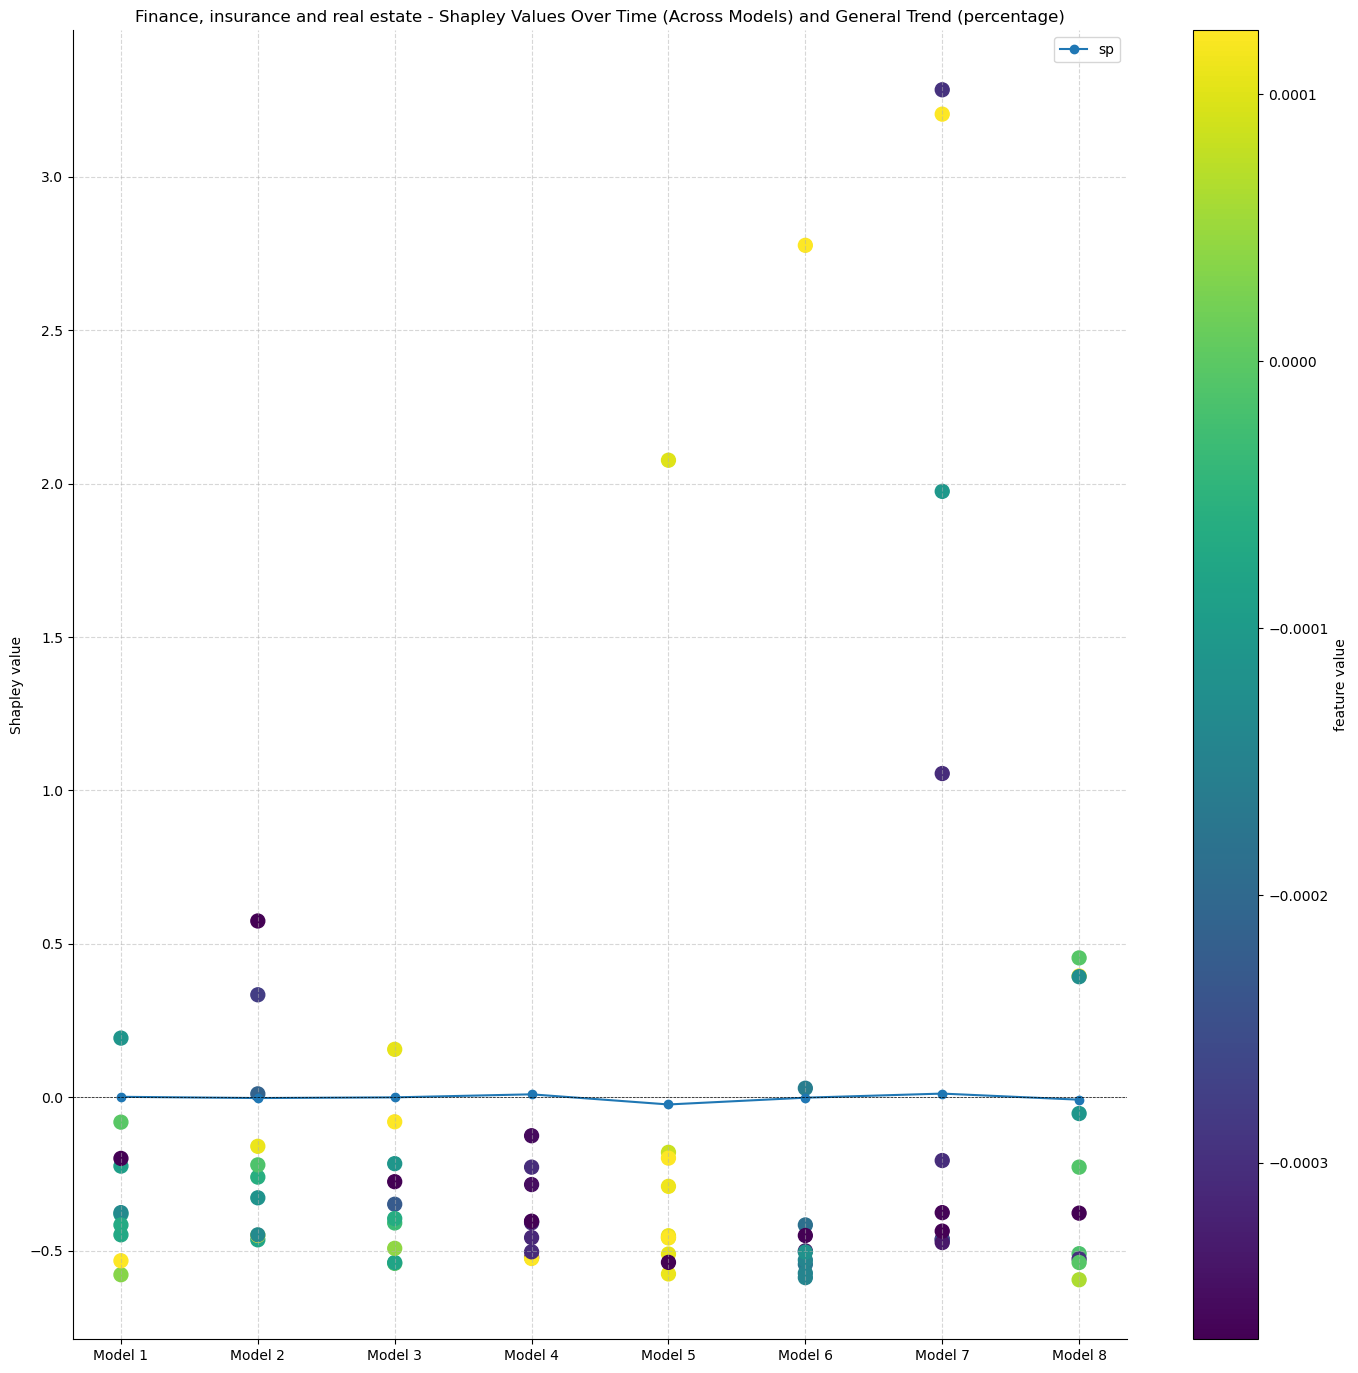

In [109]:
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(17, 17))

# feature 2

# calculate average
average_shap_values = []
for i in range(8):
    df = shapley8[i].iloc[:,[5]]  # change this line when plotting other features
    average_shap_values.append(df.mean()*100)  
    
# plot average
plt.plot(range(8), average_shap_values, label = "sp" ,marker='o', linewidth=1.5)


# plot dots
for i in range(8):
    df = shapley8[i].iloc[:,[2,5]]  # change this indexing line when switching to other features
    plt.scatter([i]*10, df.iloc[:,0], c=df.iloc[:,1], cmap='viridis', s=100)

# figure settings
x_labels = [f"Model {i}" for i in range(1,9)]
plt.xticks(range(8), x_labels)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.ylim(-1.5,)

plt.ylabel('Shapley value')
plt.title('Finance, insurance and real estate - Shapley Values Over Time (Across Models) and General Trend (percentage)')
plt.colorbar(label='feature value')
plt.show()